In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('food_coded.csv')

In [ ]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [ ]:
df1=df[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports', 'veggies_day']]

In [ ]:
df1.columns = df1.columns.str.strip().str.lower()
df1.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


In [ ]:
df1.columns.to_list()

['cook',
 'eating_out',
 'employment',
 'ethnic_food',
 'exercise',
 'fruit_day',
 'income',
 'on_off_campus',
 'pay_meal_out',
 'sports',
 'veggies_day']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


In [ ]:
for col in df1.columns:
  print(col, df1[col].unique())

cook [ 2.  3.  1.  5.  4. nan]
eating_out [3 2 1 5 4]
employment [ 3.  2.  1. nan]
ethnic_food [1 4 5 2 3]
exercise [ 1.  2.  3. nan]
fruit_day [5 4 2 3 1]
income [ 5.  4.  6.  1.  3.  2. nan]
on_off_campus [ 1.  2.  3.  4. nan]
pay_meal_out [2 4 3 5 6]
sports [ 1.  2. nan]
veggies_day [5 4 3 1 2]


In [ ]:
df1 = df1.dropna(how = "all")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


In [ ]:
for col in df1.columns:
  print(df1[col].dtype)

float64
int64
float64
int64
float64
int64
float64
float64
int64
float64
int64


In [ ]:
for col in df1.columns:
  df1[col].fillna(df1[col].median(), inplace=True)

/tmp/ipython-input-3137789057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           125 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     125 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       125 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         125 non-null    float64
 7   on_off_campus  125 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         125 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


<Axes: >

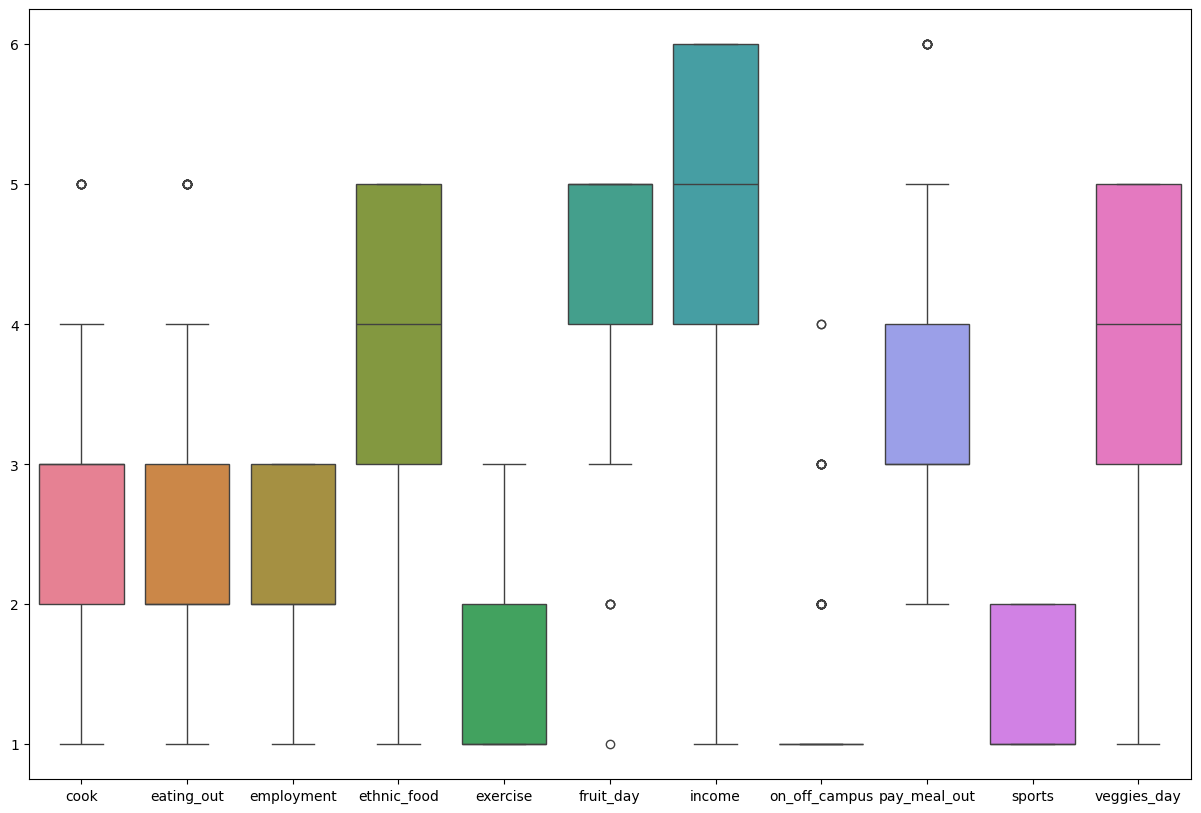

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df1)

In [ ]:
max_threshold = df1.quantile(0.95)
max_threshold

,0.95
cook,5.0
eating_out,5.0
employment,3.0
ethnic_food,5.0
exercise,3.0
fruit_day,5.0
income,6.0
on_off_campus,3.0
pay_meal_out,6.0
sports,2.0


In [ ]:
df1 = df1.drop(df1[df1['cook'] > 4].index)
df1 = df1.drop(df1[df1['eating_out'] > 4].index)
df1 = df1.drop(df1[df1['fruit_day'] < 3].index)
df1 = df1.drop(df1[df1['on_off_campus'] > 1].index)
df1 = df1.drop(df1[df1['pay_meal_out'] > 5].index)

In [ ]:
df1.shape

(75, 11)

<Axes: >

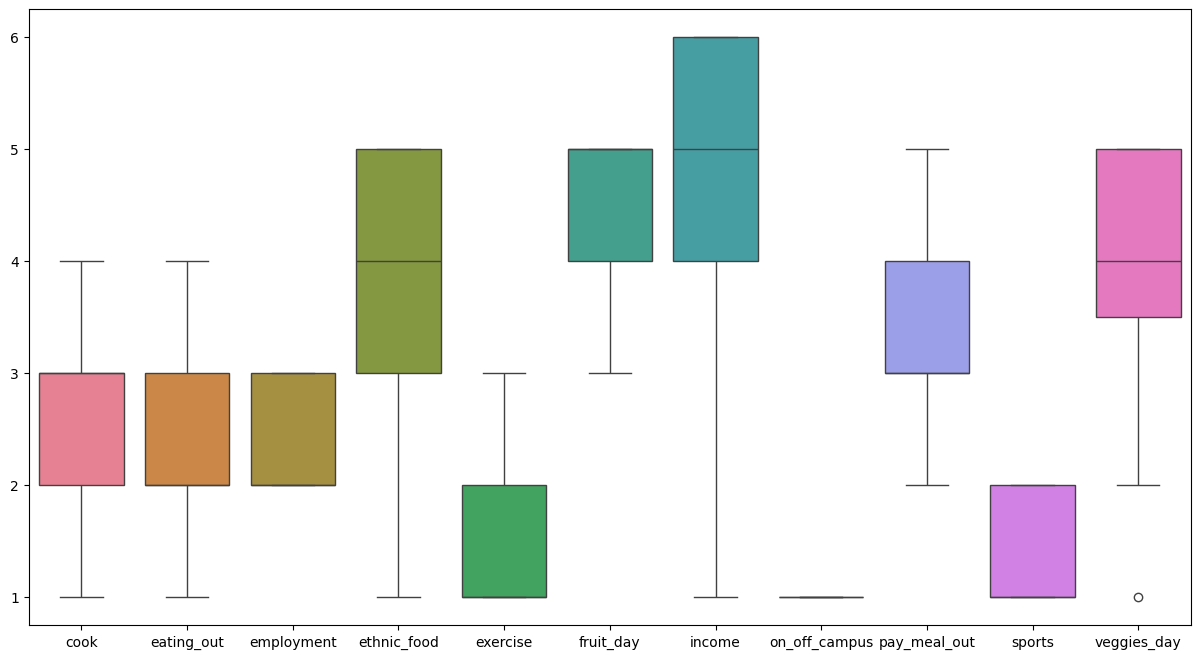

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1)

In [ ]:
# outlier in veggies_day
df1 = df1.drop(df1[df1['veggies_day'] < 1.5].index)

<Axes: >

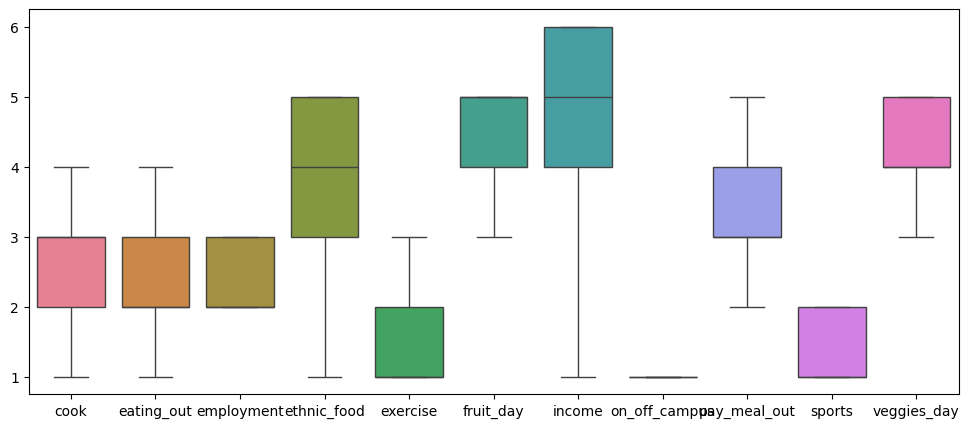

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df1)

In [ ]:
df1.drop(df1[df1['veggies_day'] < 3].index, inplace=True)

<Axes: >

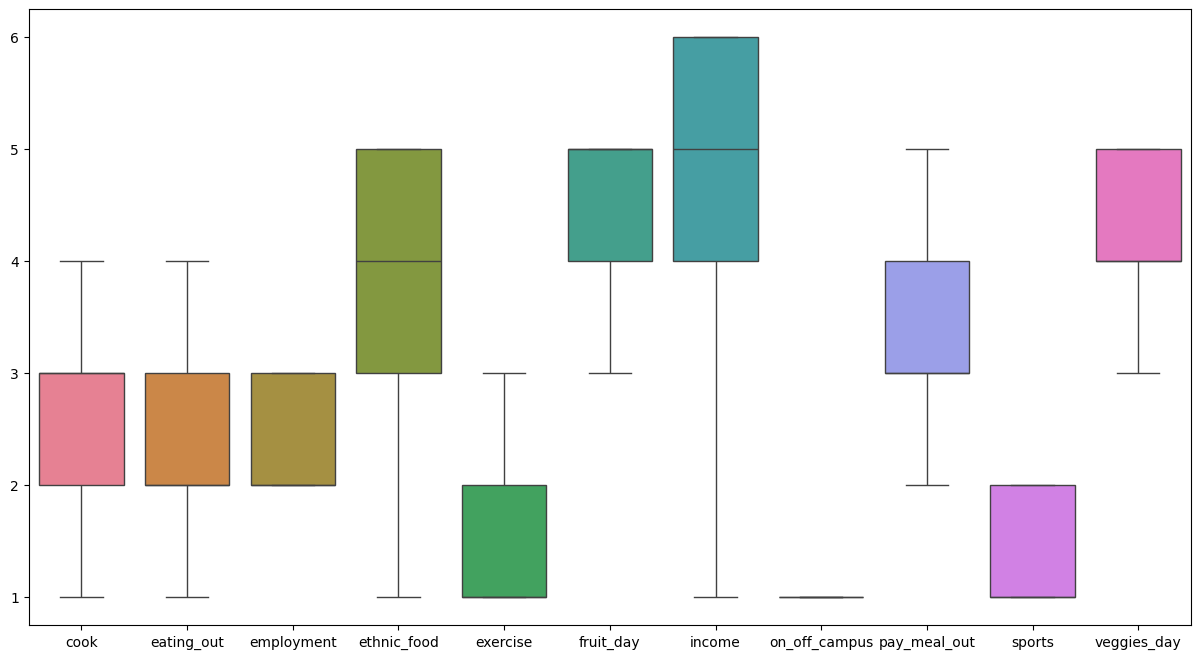

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1)

In [ ]:
df1.shape

(66, 11)

In [ ]:
df1 = df1.reset_index(drop = True)

In [ ]:
df1.head()

,index,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
3,4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
4,7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4


In [ ]:
df1.drop('index', axis=1, inplace=True)

In [ ]:
df1.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
3,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
4,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4


In [ ]:
df1.to_csv('food_coded_cleaned2.csv')

In [ ]:
X = df1.copy()

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X.isnull().sum()

,0
cook,0
eating_out,0
employment,0
ethnic_food,0
exercise,0
fruit_day,0
income,0
on_off_campus,0
pay_meal_out,0
sports,0


In [ ]:
X['on_off_campus'].unique()

array([1.])

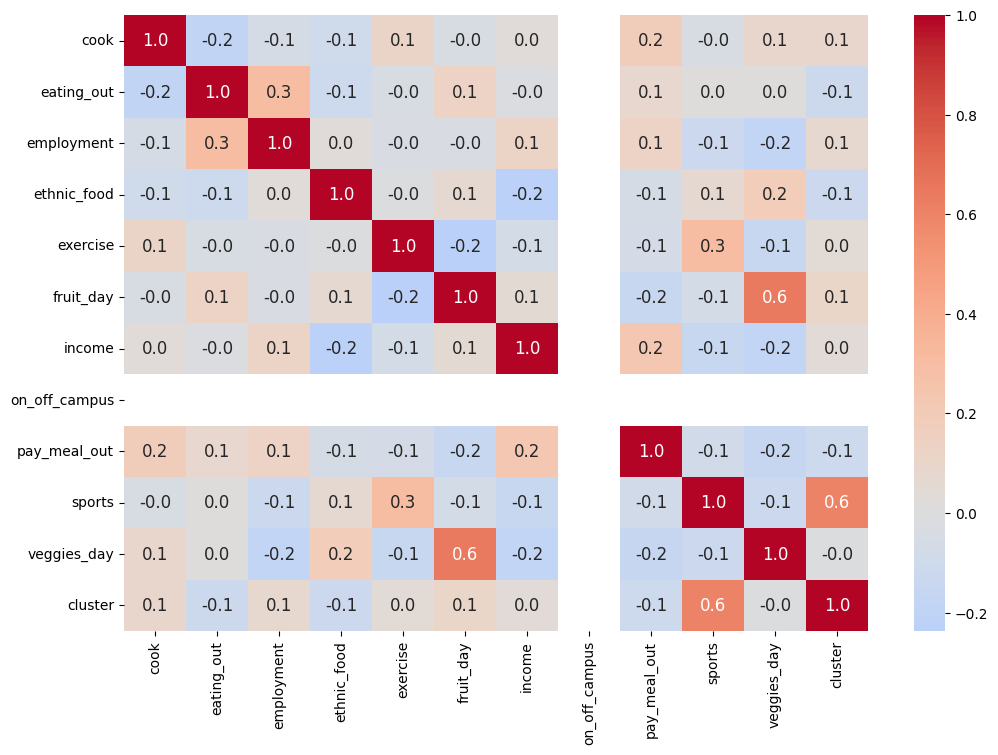

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), fmt='0.1f', cmap='coolwarm', annot = True, annot_kws={"size": 12}, center = 0)
plt.show()

In [ ]:
X.drop(columns = ['on_off_campus','cluster'], axis=1, inplace=True)

In [ ]:
X.columns.to_list()

['cook',
 'eating_out',
 'employment',
 'ethnic_food',
 'exercise',
 'fruit_day',
 'income',
 'pay_meal_out',
 'sports',
 'veggies_day']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Silhouette Score for k = 2: 0.2040723188995117
Silhouette Score for k = 3: 0.18296272878552125
Silhouette Score for k = 4: 0.2195190215662754
Silhouette Score for k = 5: 0.1957969029773161
Silhouette Score for k = 6: 0.20212981931710658
Silhouette Score for k = 7: 0.17474009470940674
Silhouette Score for k = 8: 0.18189312242677225
Silhouette Score for k = 9: 0.1829976803599721
Silhouette Score for k = 10: 0.19008781467799982
Silhouette Score for k = 11: 0.1763181134788653


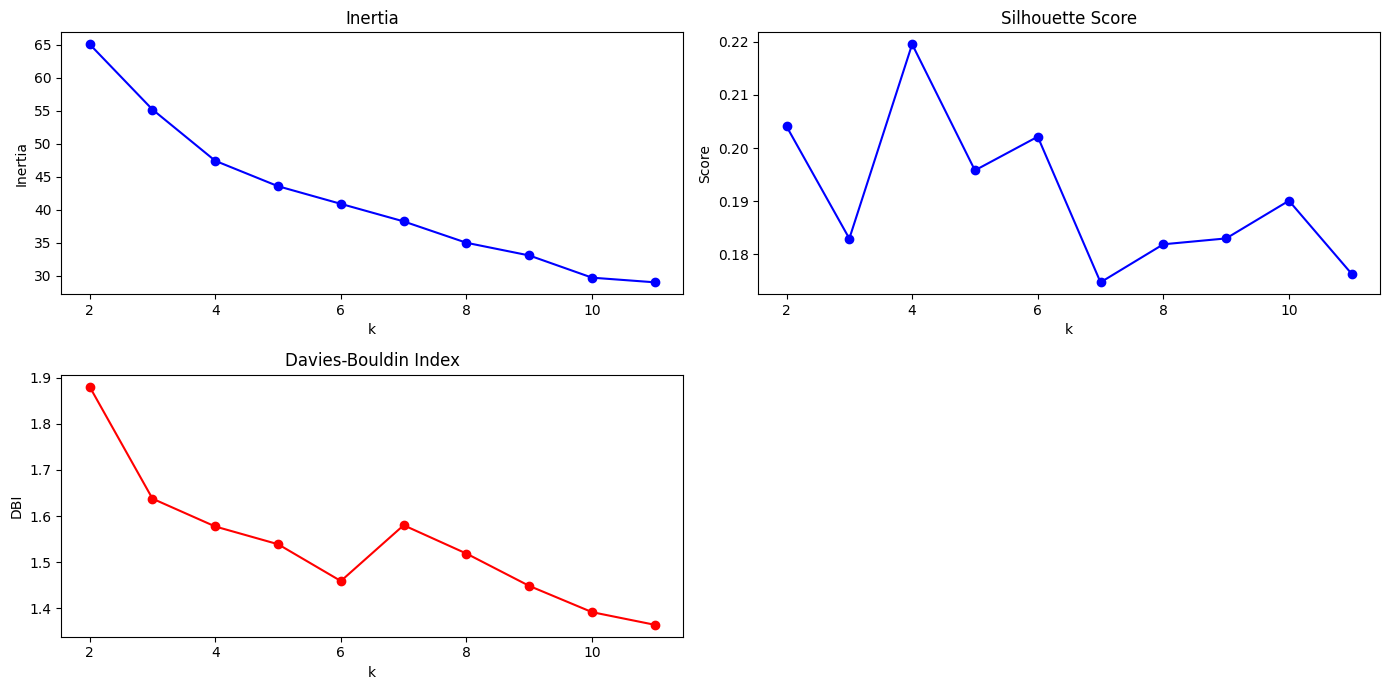

Maximum Silhouette Score: 0.2195190215662754 at k = 4
Minimum Davies-Bouldin Index: 1.36394810441845 at k = 11


In [ ]:
Ks = range(2, 12)
inertia, sil_scores, db_scores = [], [], []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
    print("Silhouette Score for k = {}: {}".format(k, sil_scores[-1]))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.plot(Ks, inertia, 'bo-'); plt.title('Inertia'); plt.xlabel('k'); plt.ylabel('Inertia')
plt.subplot(2,2,2)
plt.plot(Ks, sil_scores, 'bo-'); plt.title('Silhouette Score'); plt.xlabel('k'); plt.ylabel('Score')
plt.subplot(2,2,3)
plt.plot(Ks, db_scores, 'ro-'); plt.title('Davies-Bouldin Index'); plt.xlabel('k'); plt.ylabel('DBI')
plt.tight_layout()
plt.show()

max_sil = max(sil_scores)
max_sil_K = Ks[sil_scores.index(max_sil)]
print("Maximum Silhouette Score: {} at k = {}".format(max_sil, max_sil_K))

min_db = min(db_scores)
min_db_K = Ks[db_scores.index(min_db)]
print("Minimum Davies-Bouldin Index: {} at k = {}".format(min_db, min_db_K))

In [ ]:
optimalK = 4
kmeans = KMeans(n_clusters=optimalK, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

In [ ]:
X["cluster"] = labels

<Axes: xlabel='cook', ylabel='eating_out'>

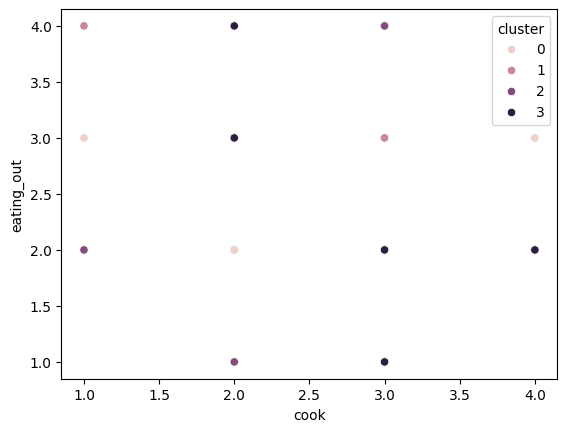

In [ ]:
sns.scatterplot(x="cook", y="eating_out", hue="cluster", data=X)

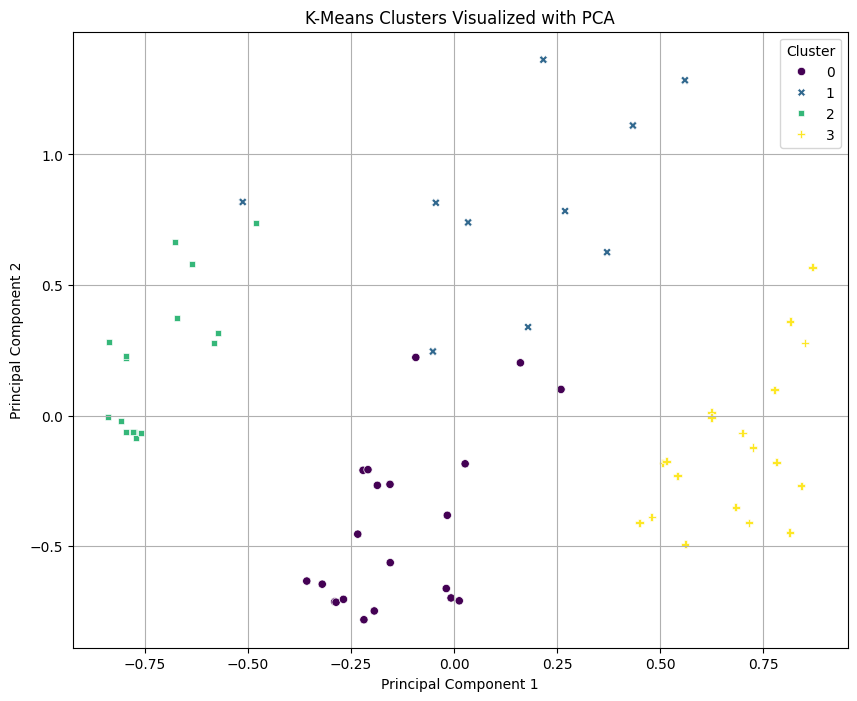

In [ ]:
# 4. Reduce dimensions with PCA
# This projects the data onto the 2 most important principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 5. Create a new DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels

# 6. Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', style='cluster')
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

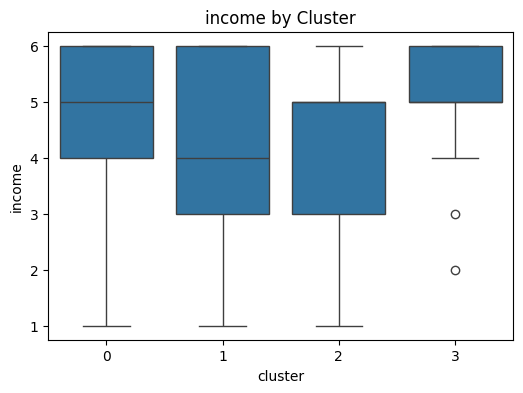

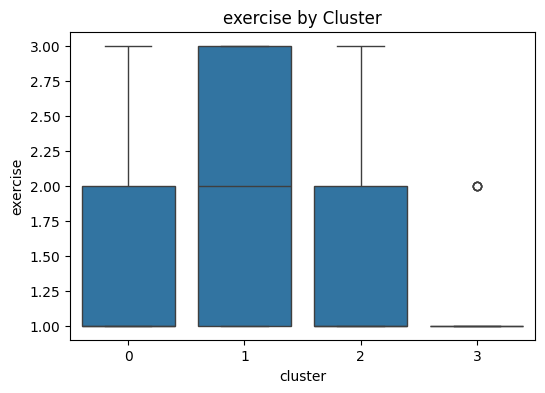

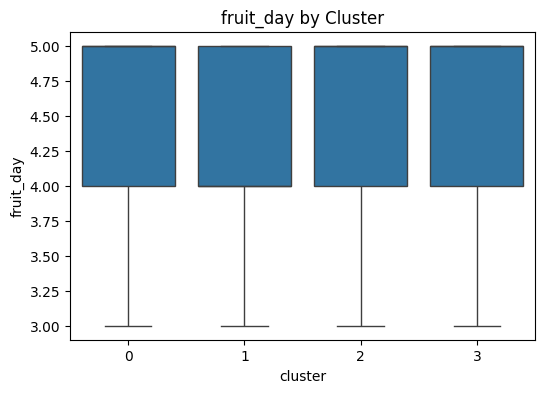

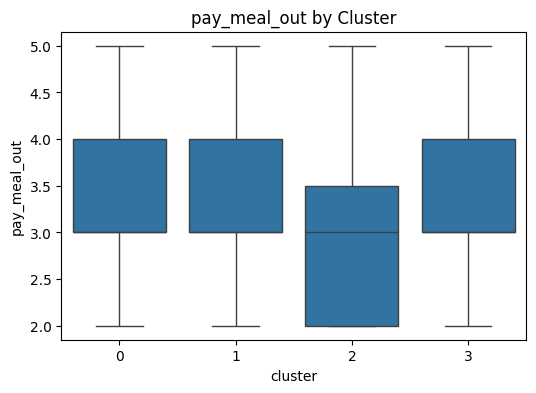

In [ ]:
for col in ['income','exercise','fruit_day','pay_meal_out']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=col, data=X)
    plt.title(f'{col} by Cluster')
    plt.show()


In [ ]:
print("X columns:", list(X.columns))
print("Feature columns length:", len(feature_columns))
print("Cluster centers shape:", kmeans.cluster_centers_.shape)


X columns: ['cook', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'fruit_day', 'income', 'pay_meal_out', 'sports', 'veggies_day', 'cluster']
Feature columns length: 10
Cluster centers shape: (4, 10)


In [ ]:
# Remove 'cluster' column if it exists
feature_columns = [col for col in X.columns if col != 'cluster']

# Cluster centers as dataframe
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_columns)

print("Cluster Centers:\n", centers)

# Get distinguishing features between clusters
diff = centers.max() - centers.min()
diff = diff.sort_values(ascending=False)

print("\nFeatures that differentiate clusters the most:\n", diff)


Cluster Centers:
        cook  eating_out    employment  ethnic_food  exercise  fruit_day  \
0  0.587302    0.396825  1.665335e-16     0.738095  0.214286   0.714286   
1  0.500000    0.666667  1.000000e+00     0.850000  0.500000   0.550000   
2  0.625000    0.458333  1.000000e+00     0.656250  0.093750   0.812500   
3  0.631579    0.333333  1.110223e-16     0.684211  0.342105   0.763158   

     income  pay_meal_out        sports  veggies_day  
0  0.676190      0.396825  2.220446e-16     0.738095  
1  0.600000      0.500000  9.000000e-01     0.400000  
2  0.825000      0.395833  1.665335e-16     0.687500  
3  0.652632      0.333333  1.000000e+00     0.684211  

Features that differentiate clusters the most:
 sports          1.000000
employment      1.000000
exercise        0.406250
veggies_day     0.338095
eating_out      0.333333
fruit_day       0.262500
income          0.225000
ethnic_food     0.193750
pay_meal_out    0.166667
cook            0.131579
dtype: float64


In [ ]:
summary = X.groupby("cluster").mean()
print(summary)

             cook  eating_out  employment  ethnic_food  exercise  fruit_day  \
cluster                                                                       
0        2.761905    2.190476         2.0     3.952381  1.428571   4.428571   
1        2.500000    3.000000         3.0     4.400000  2.000000   4.100000   
2        2.875000    2.375000         3.0     3.625000  1.187500   4.625000   
3        2.894737    2.000000         2.0     3.736842  1.684211   4.526316   

           income  pay_meal_out  sports  veggies_day  
cluster                                               
0        4.380952      3.190476     1.0     4.476190  
1        4.000000      3.500000     1.9     3.800000  
2        5.125000      3.187500     1.0     4.375000  
3        4.263158      3.000000     2.0     4.368421  


In [ ]:
results = {}
# Try multiple k values
for k in [3,4,5,6]:
    kmeans1 = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels1 = kmeans1.fit_predict(X)

    # Compute silhouette
    sil_score = silhouette_score(X, labels1)

    # Add labels to df temporarily
    df_temp = X.copy()
    df_temp["cluster"] = labels1

    # Cluster centers (converted to dataframe)
    centers = pd.DataFrame(kmeans1.cluster_centers_, columns=X.columns)

    # Cluster-wise means
    cluster_summary = df_temp.groupby("cluster")[X.columns].mean()

    results[k] = {
        "silhouette": sil_score,
        "centers": centers,
        "summary": cluster_summary
    }

    print("="*60)
    print(f"Results for k = {k}")
    print(f"Silhouette Score: {sil_score:.3f}")
    print("\nCluster Centers:")
    print(centers)
    print("\nCluster Summary:")
    print(cluster_summary)
    print("\n")


Results for k = 3
Silhouette Score: 0.151

Cluster Centers:
       cook  eating_out  employment  ethnic_food  exercise  fruit_day  \
0  2.923077    2.153846    2.538462         3.50      1.50   4.615385   
1  2.850000    2.300000    2.350000         4.45      1.75   4.350000   
2  2.550000    2.500000    2.250000         3.80      1.35   4.350000   

     income  pay_meal_out    sports  veggies_day   cluster  
0  5.346154      3.153846  1.461538     4.307692  2.461538  
1  2.550000      3.000000  1.550000     4.450000  1.500000  
2  5.250000      3.400000  1.250000     4.200000  0.250000  

Cluster Summary:
             cook  eating_out  employment  ethnic_food  exercise  fruit_day  \
cluster                                                                       
0        2.923077    2.153846    2.538462         3.50      1.50   4.615385   
1        2.850000    2.300000    2.350000         4.45      1.75   4.350000   
2        2.550000    2.500000    2.250000         3.80      1.35   4.

##Final k = 4

Using pca

Original features: 10
PCA components to keep 90% variance: 8
Explained variance ratio sum: 0.94


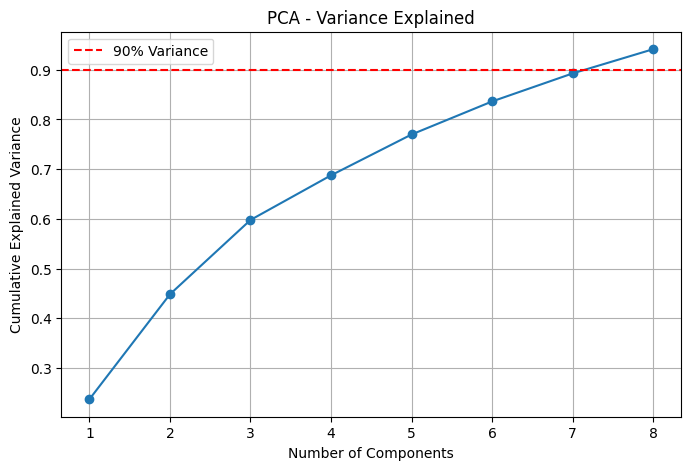

In [ ]:
# X_scaled is your scaled feature matrix (after MinMaxScaler / StandardScaler)

# 1. Fit PCA to capture 90% variance
pca = PCA(n_components=0.90, random_state=42)   # keep 90% variance
X_pca = pca.fit_transform(X_scaled)

# 2. Check how many components were selected
print(f"Original features: {X_scaled.shape[1]}")
print(f"PCA components to keep 90% variance: {X_pca.shape[1]}")
print(f"Explained variance ratio sum: {pca.explained_variance_ratio_.sum():.2f}")

# 3. Plot cumulative explained variance to visualize
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.legend()
plt.grid(True)
plt.show()

# 4. Create PCA dataframe (if needed for clustering later)
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def run_kmeans_and_evaluate(X, k=4, name=""):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    sil = silhouette_score(X, labels)
    print(f"{name} | k={k} | Silhouette Score: {sil:.3f}")
    return labels, kmeans
pca_df1 = pca_df.copy()
pca_df1['cluster'] = labels
# Run on original scaled data
labels_scaled, kmeans_scaled = run_kmeans_and_evaluate(X_scaled, k=4, name="Original Scaled")

# Run on PCA reduced data
labels_pca, kmeans_pca = run_kmeans_and_evaluate(pca_df, k=4, name="PCA Reduced (90% var)")

# Compare explained variance
print("\nPCA explained variance (per component):")
print(pca.explained_variance_ratio_)


Original Scaled | k=4 | Silhouette Score: 0.220
PCA Reduced (90% var) | k=4 | Silhouette Score: 0.248

PCA explained variance (per component):
[0.23714776 0.21120148 0.14945274 0.08979281 0.08216686 0.06648399
 0.05637323 0.04870696]


In [ ]:
# 4. Reduce dimensions with PCA
# This projects the data onto the 2 most important principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pca_df)

# 5. Create a new DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels

# 6. Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', style='cluster')
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
pca_df1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster
0,-0.808457,-0.020619,0.372270,-0.136078,0.176176,-0.555634,-0.137069,-0.591083,2
1,-0.155330,-0.263558,-0.591930,-0.117772,-0.173588,0.157043,-0.168673,0.178791,0
2,0.434244,1.110819,0.157736,0.250854,-0.008513,-0.219141,0.718623,-0.096959,1
3,-0.220755,-0.209691,-0.575671,-0.424124,-0.185285,-0.227064,0.301459,0.383834,0
4,0.625293,0.012287,-0.051122,-0.287239,0.640272,0.023689,-0.214689,0.164013,3


In [ ]:
pca_df1.to_csv('pca_df.csv')

In [ ]:
pca_df.to_csv('pca_df1(without cluster).csv')

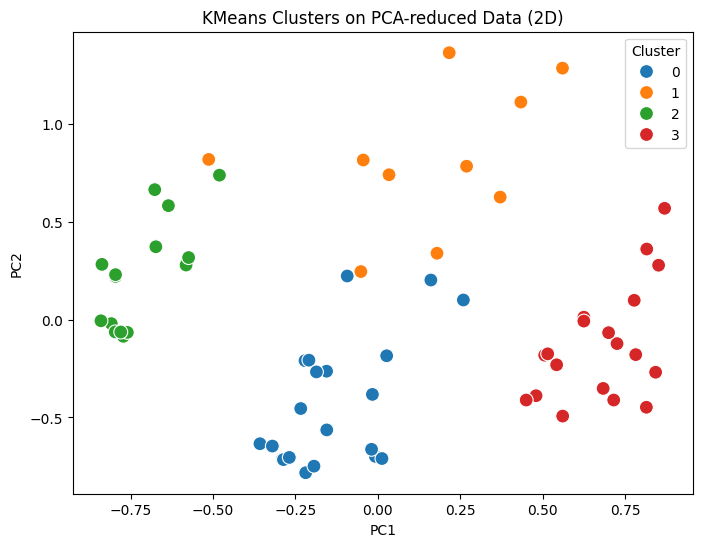

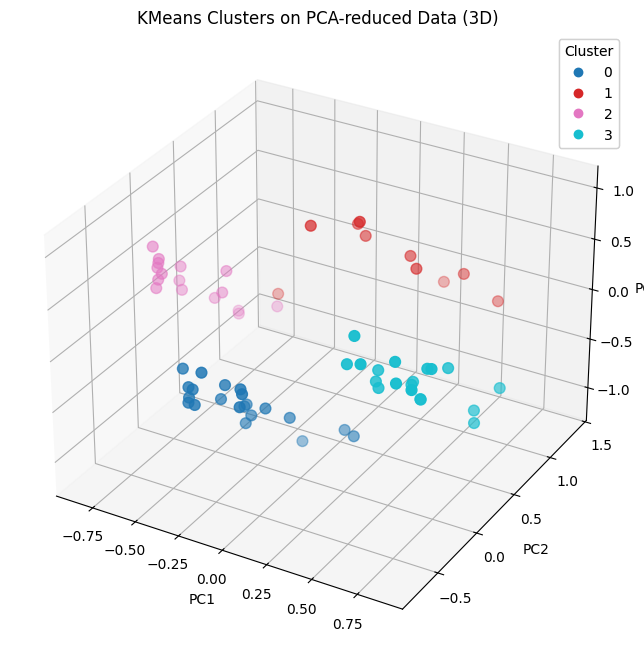

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 2D Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_df1.iloc[:,0],  # first PCA component
    y=pca_df1.iloc[:,1],  # second PCA component
    hue=pca_df1['cluster'],
    palette='tab10',
    s=100
)
plt.title('KMeans Clusters on PCA-reduced Data (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

# 3D Visualization (if you want 3 components)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_df1.iloc[:,0],  # PC1
    pca_df1.iloc[:,1],  # PC2
    pca_df1.iloc[:,2],  # PC3
    c=pca_df1['cluster'],
    cmap='tab10',
    s=60
)
ax.set_title('KMeans Clusters on PCA-reduced Data (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()


Silhouette Score for k = 2: 0.21386152458446198
Silhouette Score for k = 3: 0.16135409813277948
Silhouette Score for k = 4: 0.14108051808542704
Silhouette Score for k = 5: 0.13722980600183998
Silhouette Score for k = 6: 0.127290254224738
Silhouette Score for k = 7: 0.1091693181187573
Silhouette Score for k = 8: 0.11266310493469447
Silhouette Score for k = 9: 0.1128049427165354


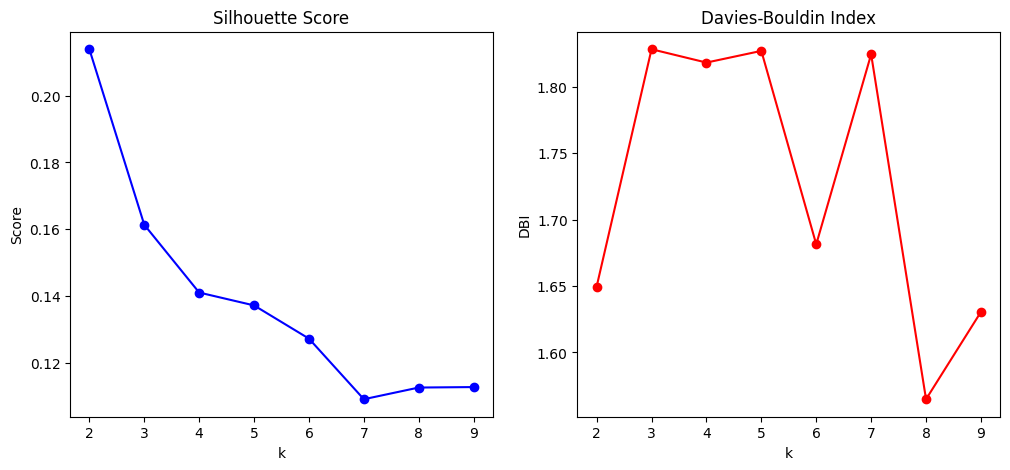

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

Ks = range(2, 10)
sil_scores, db_scores = [], []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))
    print("Silhouette Score for k = {}: {}".format(k, sil_scores[-1]))
    db_scores.append(davies_bouldin_score(X, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(Ks, sil_scores, 'bo-'); plt.title('Silhouette Score'); plt.xlabel('k'); plt.ylabel('Score')
plt.subplot(1,2,2)
plt.plot(Ks, db_scores, 'ro-'); plt.title('Davies-Bouldin Index'); plt.xlabel('k'); plt.ylabel('DBI')
plt.show()


Silhouette Score for k = 2: 0.14677860483133695
Silhouette Score for k = 3: 0.13308167401287663
Silhouette Score for k = 4: 0.14318875605542616
Silhouette Score for k = 5: 0.13257157207400622
Silhouette Score for k = 6: 0.12689966083448498
Silhouette Score for k = 7: 0.11828422473314798
Silhouette Score for k = 8: 0.12424382696720924
Silhouette Score for k = 9: 0.11563802033086026


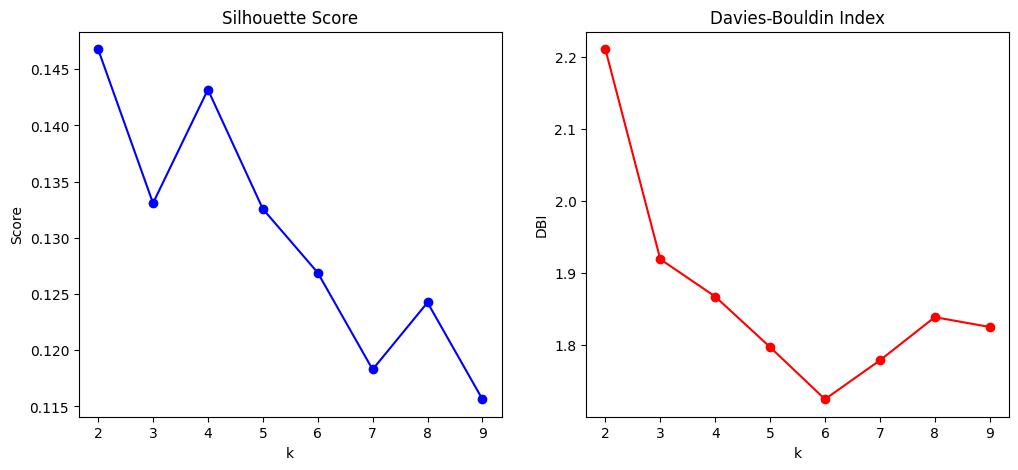

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

Ks = range(2, 10)
sil_scores, db_scores = [], []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df1)
    sil_scores.append(silhouette_score(df1, labels))
    print("Silhouette Score for k = {}: {}".format(k, sil_scores[-1]))
    db_scores.append(davies_bouldin_score(df1, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(Ks, sil_scores, 'bo-'); plt.title('Silhouette Score'); plt.xlabel('k'); plt.ylabel('Score')
plt.subplot(1,2,2)
plt.plot(Ks, db_scores, 'ro-'); plt.title('Davies-Bouldin Index'); plt.xlabel('k'); plt.ylabel('DBI')
plt.show()
